## Leetcode

623. Add One Row to Tree

https://leetcode.com/problems/add-one-row-to-tree/?envType=daily-question&envId=2024-04-16

**Description**

    Given the root of a binary tree and two integers val and depth, add a row of nodes with value val at the given depth depth.

    Note that the root node is at depth 1.

    The adding rule is:

    Given the integer depth, for each not null tree node cur at the depth depth - 1, create two tree nodes with value val as cur's left subtree root and right subtree root.
    cur's original left subtree should be the left subtree of the new left subtree root.
    cur's original right subtree should be the right subtree of the new right subtree root.
    If depth == 1 that means there is no depth depth - 1 at all, then create a tree node with value val as the new root of the whole original tree, and the original tree is the new root's left subtree.


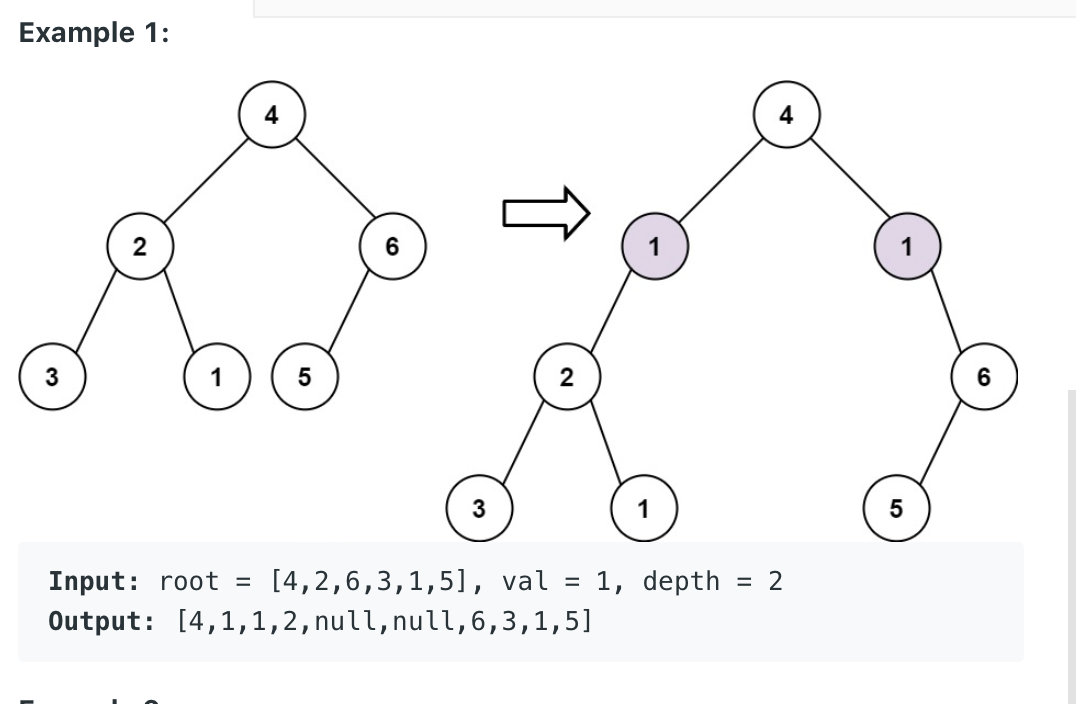

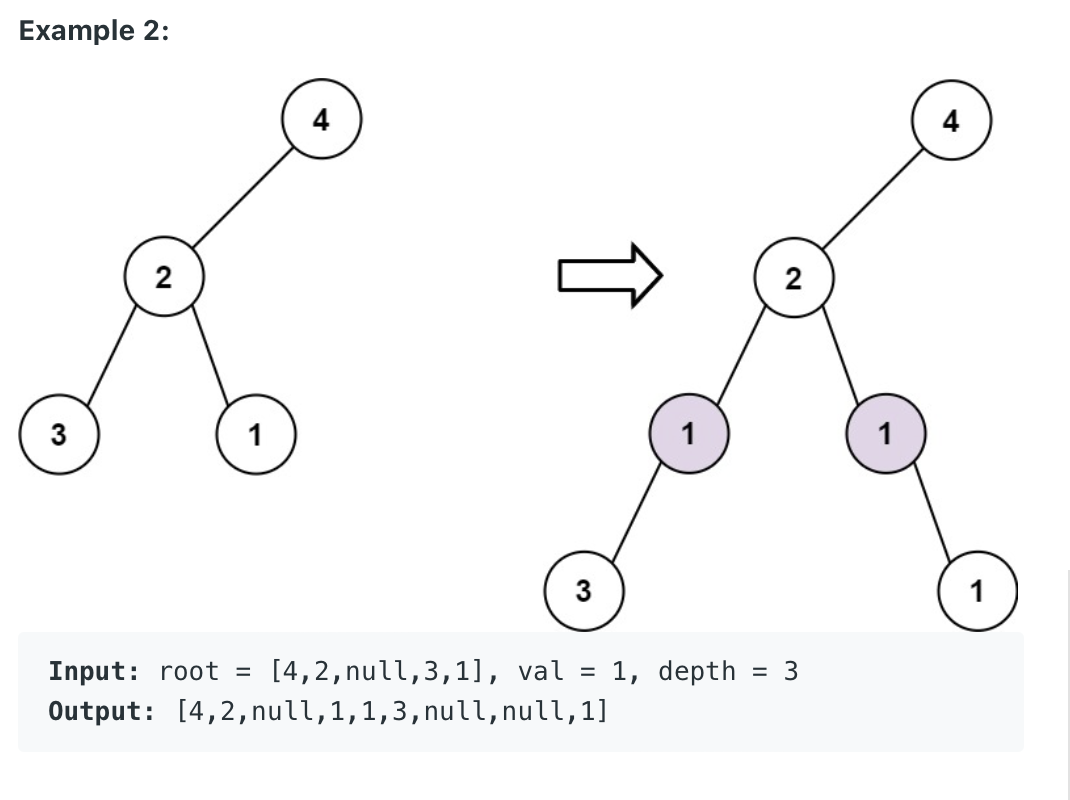


**Constraints**

    The number of nodes in the tree is in the range [1, 10^4].
    The depth of the tree is in the range [1, 10^4].
    -100 <= Node.val <= 100
    -10^5 <= val <= 10^5
    1 <= depth <= the depth of tree + 1


In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        

In [2]:
from typing import Optional

In [3]:
class Solution:
    def addOneRow(self, root: Optional[TreeNode], val: int, depth: int) -> Optional[TreeNode]:

        if depth == 1:
            new_tree = TreeNode(val)
            new_tree.left = root
            return new_tree
        
        def dfs(node, d):
            if not node:
                return
            
            if d==depth-1:
                left_child, right_child = TreeNode(val), TreeNode(val)
                left_child.left, right_child.right = node.left, node.right
                node.left, node.right = left_child.left, right_child.right
                
            else:
                dfs(node.left, d+1)
                dfs(node.right, d+1)

        dfs(root, 1)

        return root

In [4]:
sol = Solution()
q1 = sol.addOneRow(TreeNode(val=4, left = TreeNode(val=2, left=TreeNode(val=3), right=TreeNode(val=1)), right =TreeNode(val=6, left=TreeNode(val=5))),
                    val=1, depth=2)
q2 = sol.addOneRow(TreeNode(val=4, left=TreeNode(val=2, left=TreeNode(val=3), right=TreeNode(val=1))),
                    val=1, depth=3)

In [5]:
from collections import deque

In [12]:
def bfsToList(root):
    if not root:
        return [None]

    result = []
    queue = deque([root])

    while queue:
        level_size = len(queue)
        level_has_node = False  # 해당 레벨에 노드가 있는지 여부를 추적하기 위한 플래그
        for _ in range(level_size):
            node = queue.popleft()
            if node:
                result.append(node.val)
                queue.append(node.left)
                queue.append(node.right)
                level_has_node = True  # 노드가 있음을 표시
            else:
                queue.append(None)  # 노드가 없다면 None을 추가해야 함
                queue.append(None)
        if not level_has_node:  # 해당 레벨에 노드가 없다면 모든 레벨이 끝났음을 의미
            break

    return result


In [13]:
bfsToList(q1)

[4, 2, 6, 3, 1, 5]

In [14]:
bfsToList(q2)

[4, 2, 3, 1]

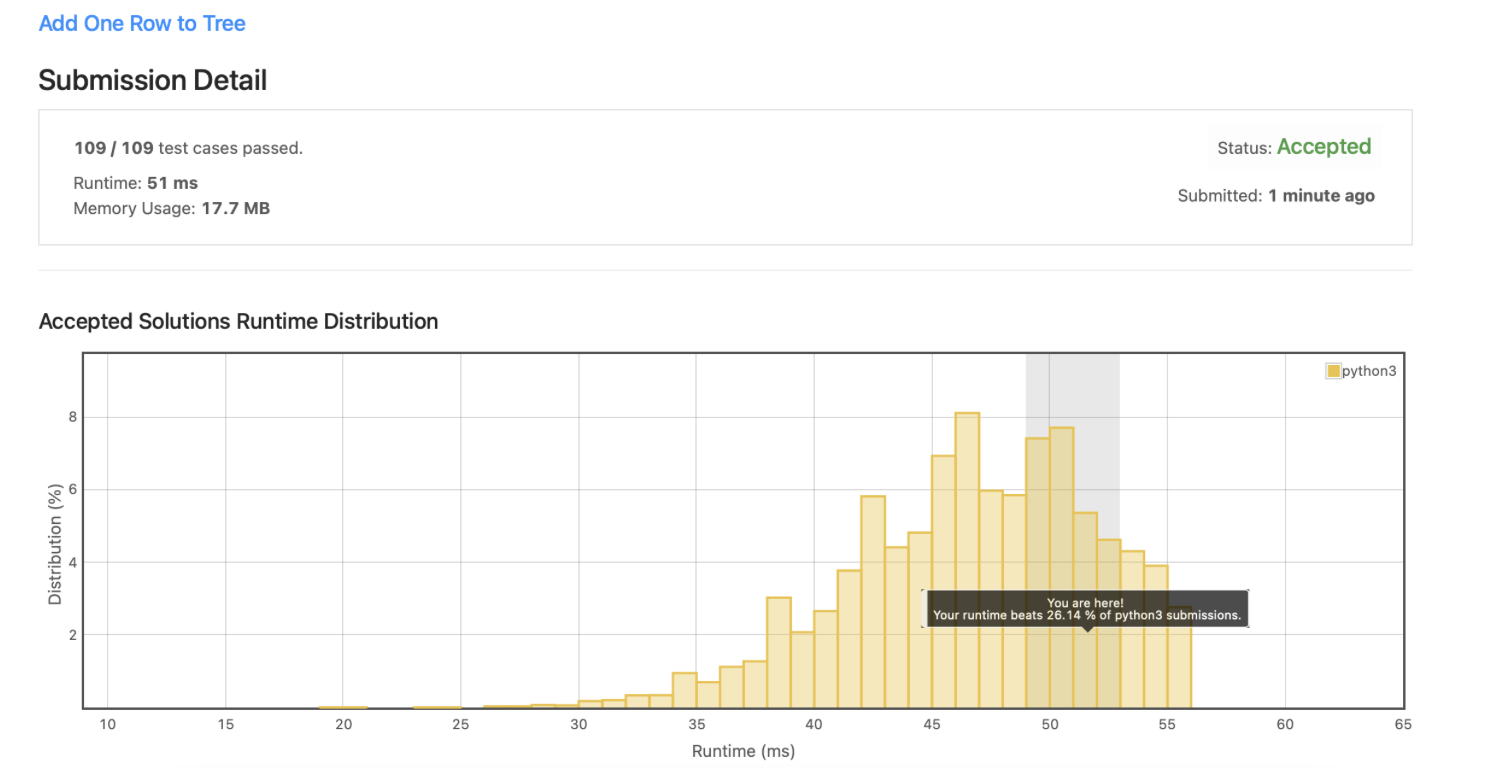
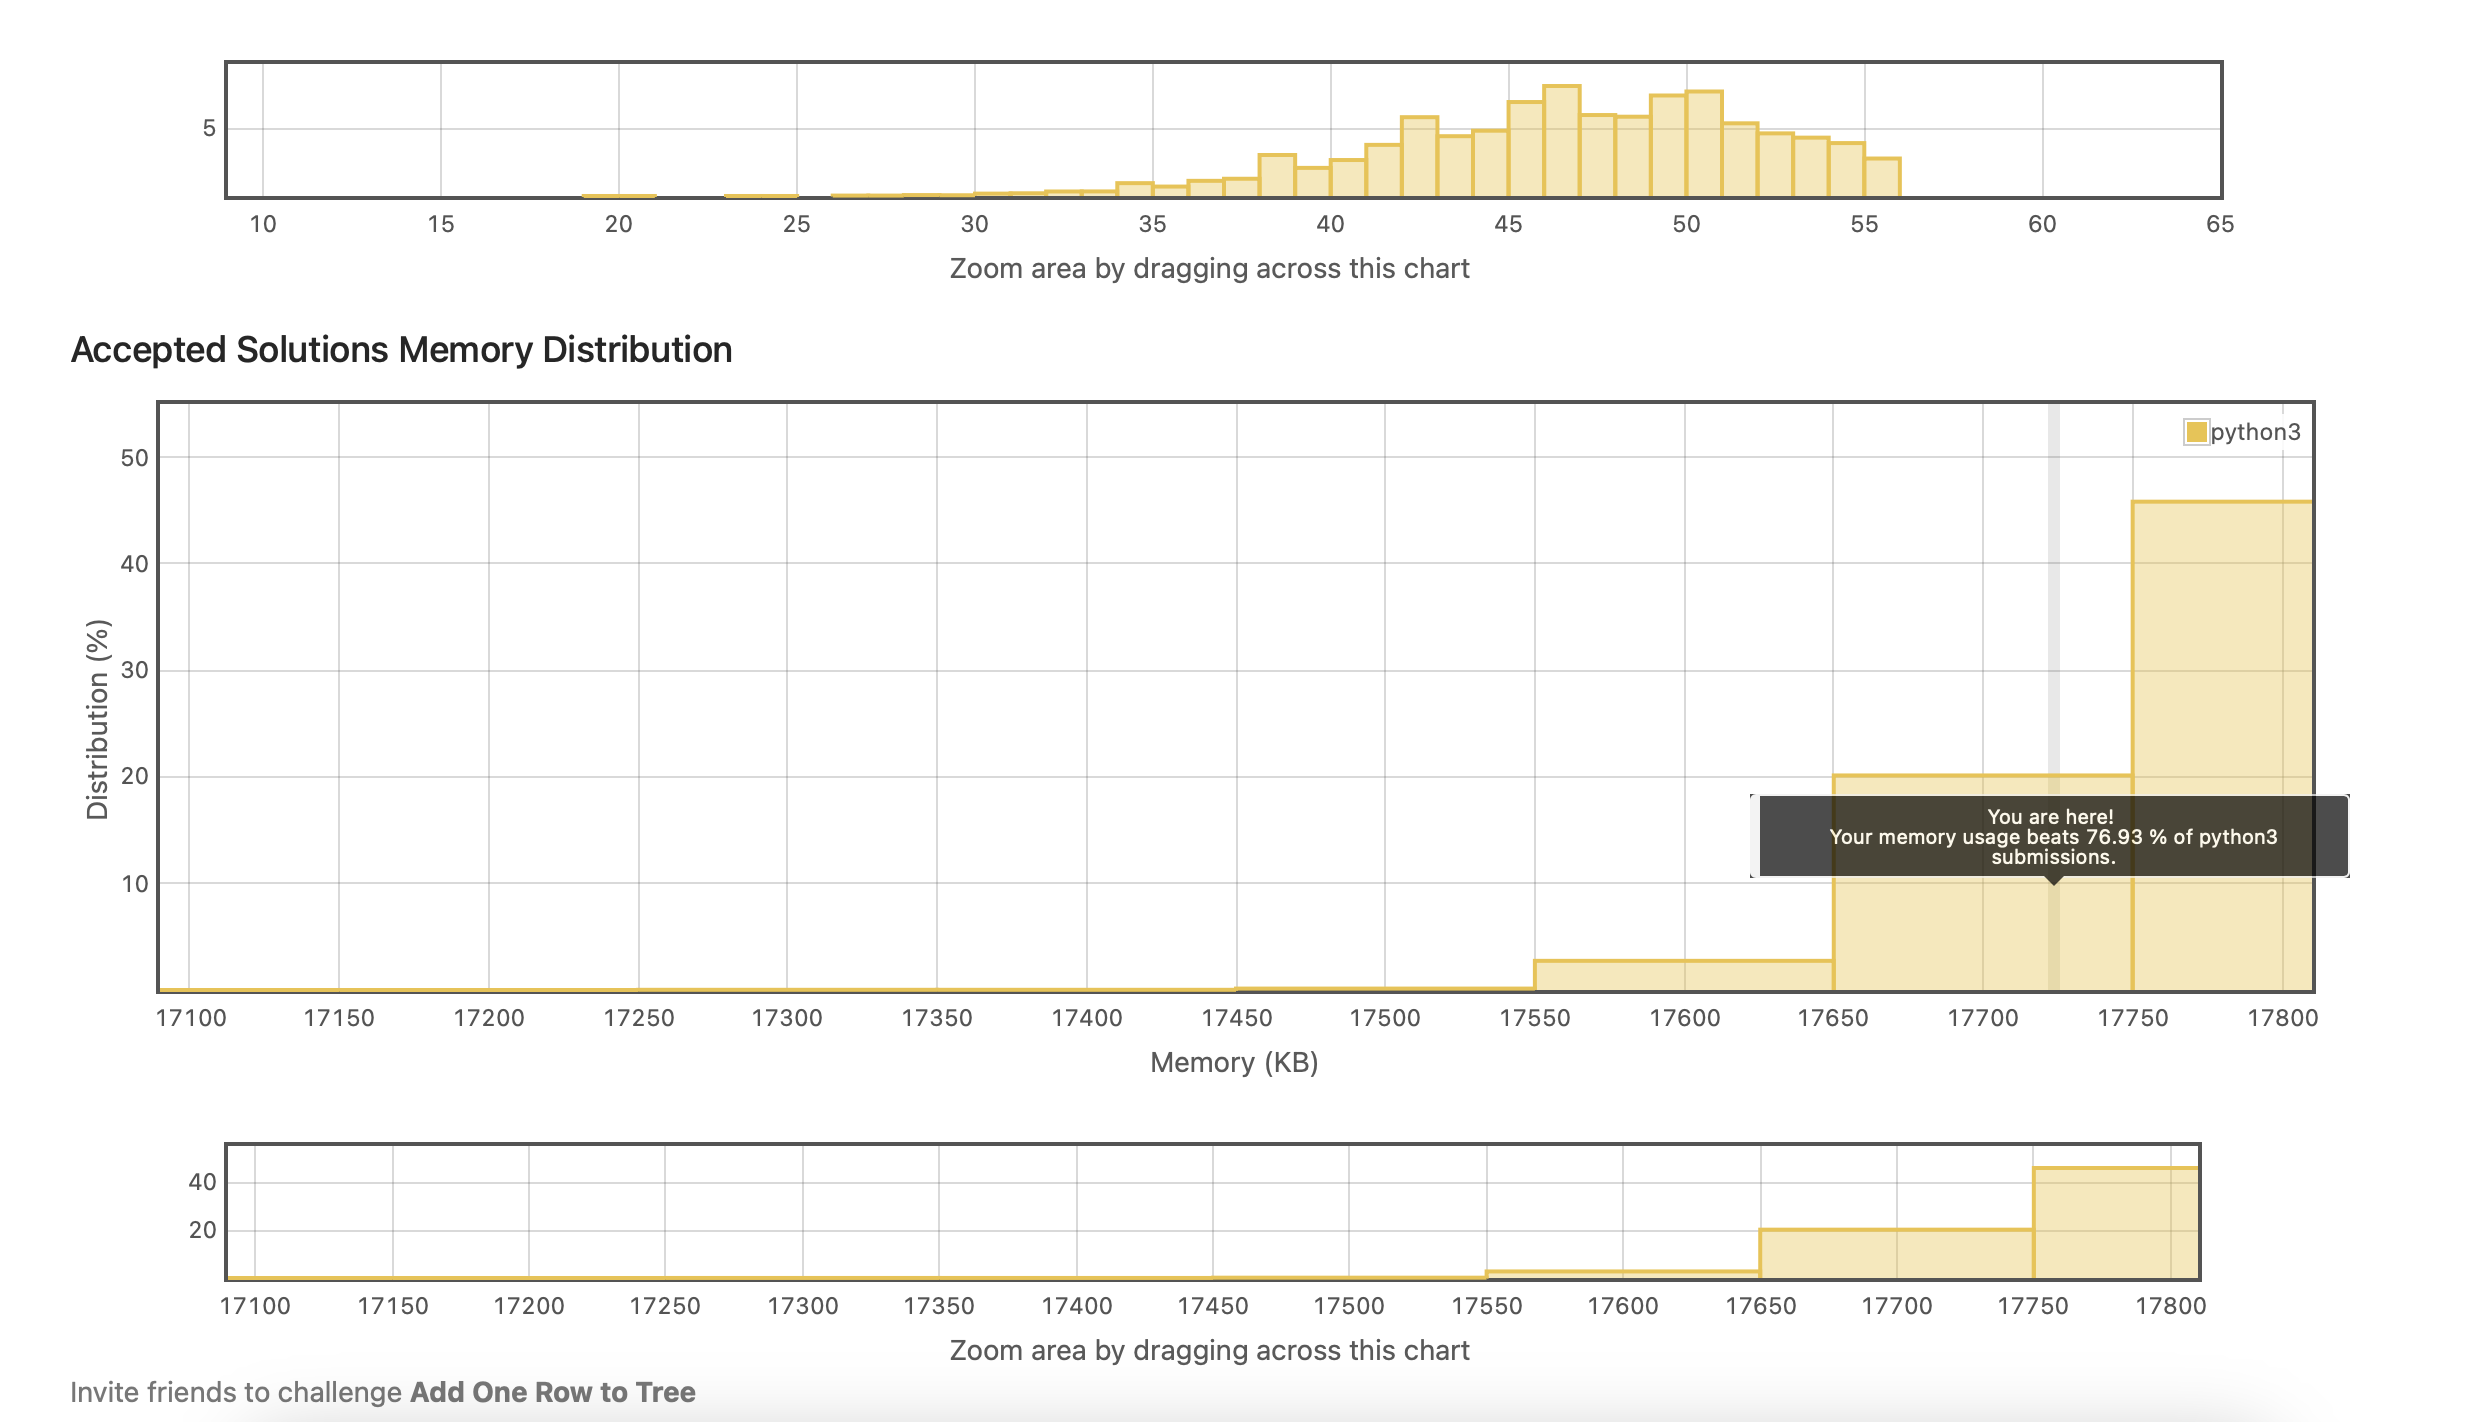